# Atomic Vibrations

In [1]:
import numpy as np
import matplotlib.pyplot as plt

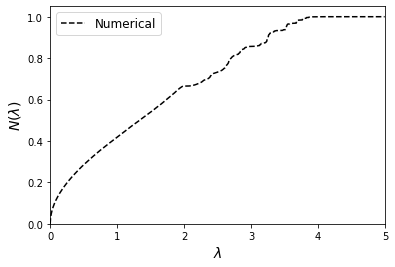

In [2]:
filename = "Datos2R"
dataNL = np.loadtxt("./results/"+filename+".txt")
dataNL = dataNL.T
fig, ax = plt.subplots(1,1)
ax.plot(dataNL[0], dataNL[1], linestyle="--", color="k", label="Numerical")
ax.set_xlabel(r"$\lambda$", fontsize=14)
ax.set_ylabel(r"$N\left(\lambda\right)$", fontsize=14)
ax.set_xlim(0,5)
ax.set_ylim(0,1.05)
plt.legend(fontsize=12)
plt.savefig("./results/"+filename+".png", transparent=True, dpi=300)
plt.show()